In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
from sklearn.linear_model import LinearRegression
import warnings
from sklearn.model_selection import train_test_split, cross_val_score
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_rows', 900)
pd.set_option('display.max_columns', 900)
pd.set_option('display.width', 1000)

warnings.simplefilter(action='ignore', category=FutureWarning);
%matplotlib inline

In [62]:
df = pd.read_csv('datasets/train.csv')
df.shape

(2051, 81)

In [61]:
kaggle_data = pd.read_csv('datasets/test.csv')
kaggle_data.shape

(878, 80)

In [45]:
submission = pd.DataFrame({'Id': kaggle_data['Id']})
submission['SalePrice'] = df['SalePrice'].mean()
submission.head()

,Id,SalePrice
0,2658,181469.701609
1,2718,181469.701609
2,2414,181469.701609
3,1989,181469.701609
4,625,181469.701609


In [46]:
submission.to_csv('datasets/mean_sub.csv', index=False)

In [47]:
#First we clean the data and explore a bit

In [56]:
kaggle_data.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage Area', 'Garage Qual', 'Garage Cond', 'Paved Drive',
       '

In [51]:
kaggle_data.isnull().sum().sort_values(ascending=False)

Pool QC            874
Misc Feature       837
Alley              820
Fence              706
Mas Vnr Type       535
Fireplace Qu       422
Lot Frontage       160
Garage Cond         45
Garage Qual         45
Garage Yr Blt       45
Garage Finish       45
Garage Type         44
Bsmt Cond           25
Bsmt Exposure       25
BsmtFin Type 1      25
Bsmt Qual           25
BsmtFin Type 2      25
Electrical           1
Mas Vnr Area         1
Id                   0
PID                  0
MS SubClass          0
MS Zoning            0
Lot Area             0
Street               0
Pool Area            0
Misc Val             0
Mo Sold              0
Yr Sold              0
Sale Type            0
Exterior 1st         0
Exterior 2nd         0
Exter Qual           0
Exter Cond           0
Foundation           0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
BsmtFin SF 

In [53]:
kaggle_data['Sale Type'].sort_values()

81       COD
193      COD
820      COD
564      COD
363      COD
145      COD
362      COD
361      COD
292      COD
39       COD
218      COD
840      COD
89       COD
232      COD
261      COD
406      COD
576      COD
241      COD
409      COD
290      COD
719      COD
800      COD
627      COD
516      COD
97       CWD
94       CWD
16       Con
243    ConLD
496    ConLD
386    ConLD
775    ConLD
334    ConLD
446    ConLD
486    ConLD
399    ConLD
152    ConLD
801    ConLI
255    ConLI
729    ConLw
615    ConLw
378    ConLw
781      New
776      New
316      New
396      New
315      New
313      New
797      New
786      New
391      New
307      New
531      New
611      New
269      New
383      New
582      New
168      New
730      New
353      New
183      New
711      New
567      New
327      New
749      New
599      New
138      New
323      New
136      New
643      New
756      New
194      New
759      New
196      New
375      New
554      New
121      New
120      New

### Brainstorm factors to go by: 

## Ten in total ##

# Numerical:
Lot Area 
Lot frontage [yard]
Garage Area
Garage Cars

# Non-Numerical:

Sale Type 
Overall Qual
Overall Cond
Kitchen Qual 

# Relationship Variables

Time stamps:

Year Built and year remodeled Year Remod/Add - If these are spaced apart then we hypothesize value is up.
If one not the other, value down (i.e. built but never remodeled)


In [63]:
# Next is Turn categorical variables into quantitative variables on a scale of 0-10 10 being best 0 worst etc. 
# Use groupby to see roughly which variables correspond with nicer houses and 
# therefore higher costs (it's what you would expect)

In [59]:
#Methodology: Start with heatmaps and histos for numerical comparsion to get the right direction
#Then work to Create Integer Encoding for The conditions of things
# One-Hot Categorical Data Where you only want to keep the top category and leave that digit at the True (1) value

<Axes: >

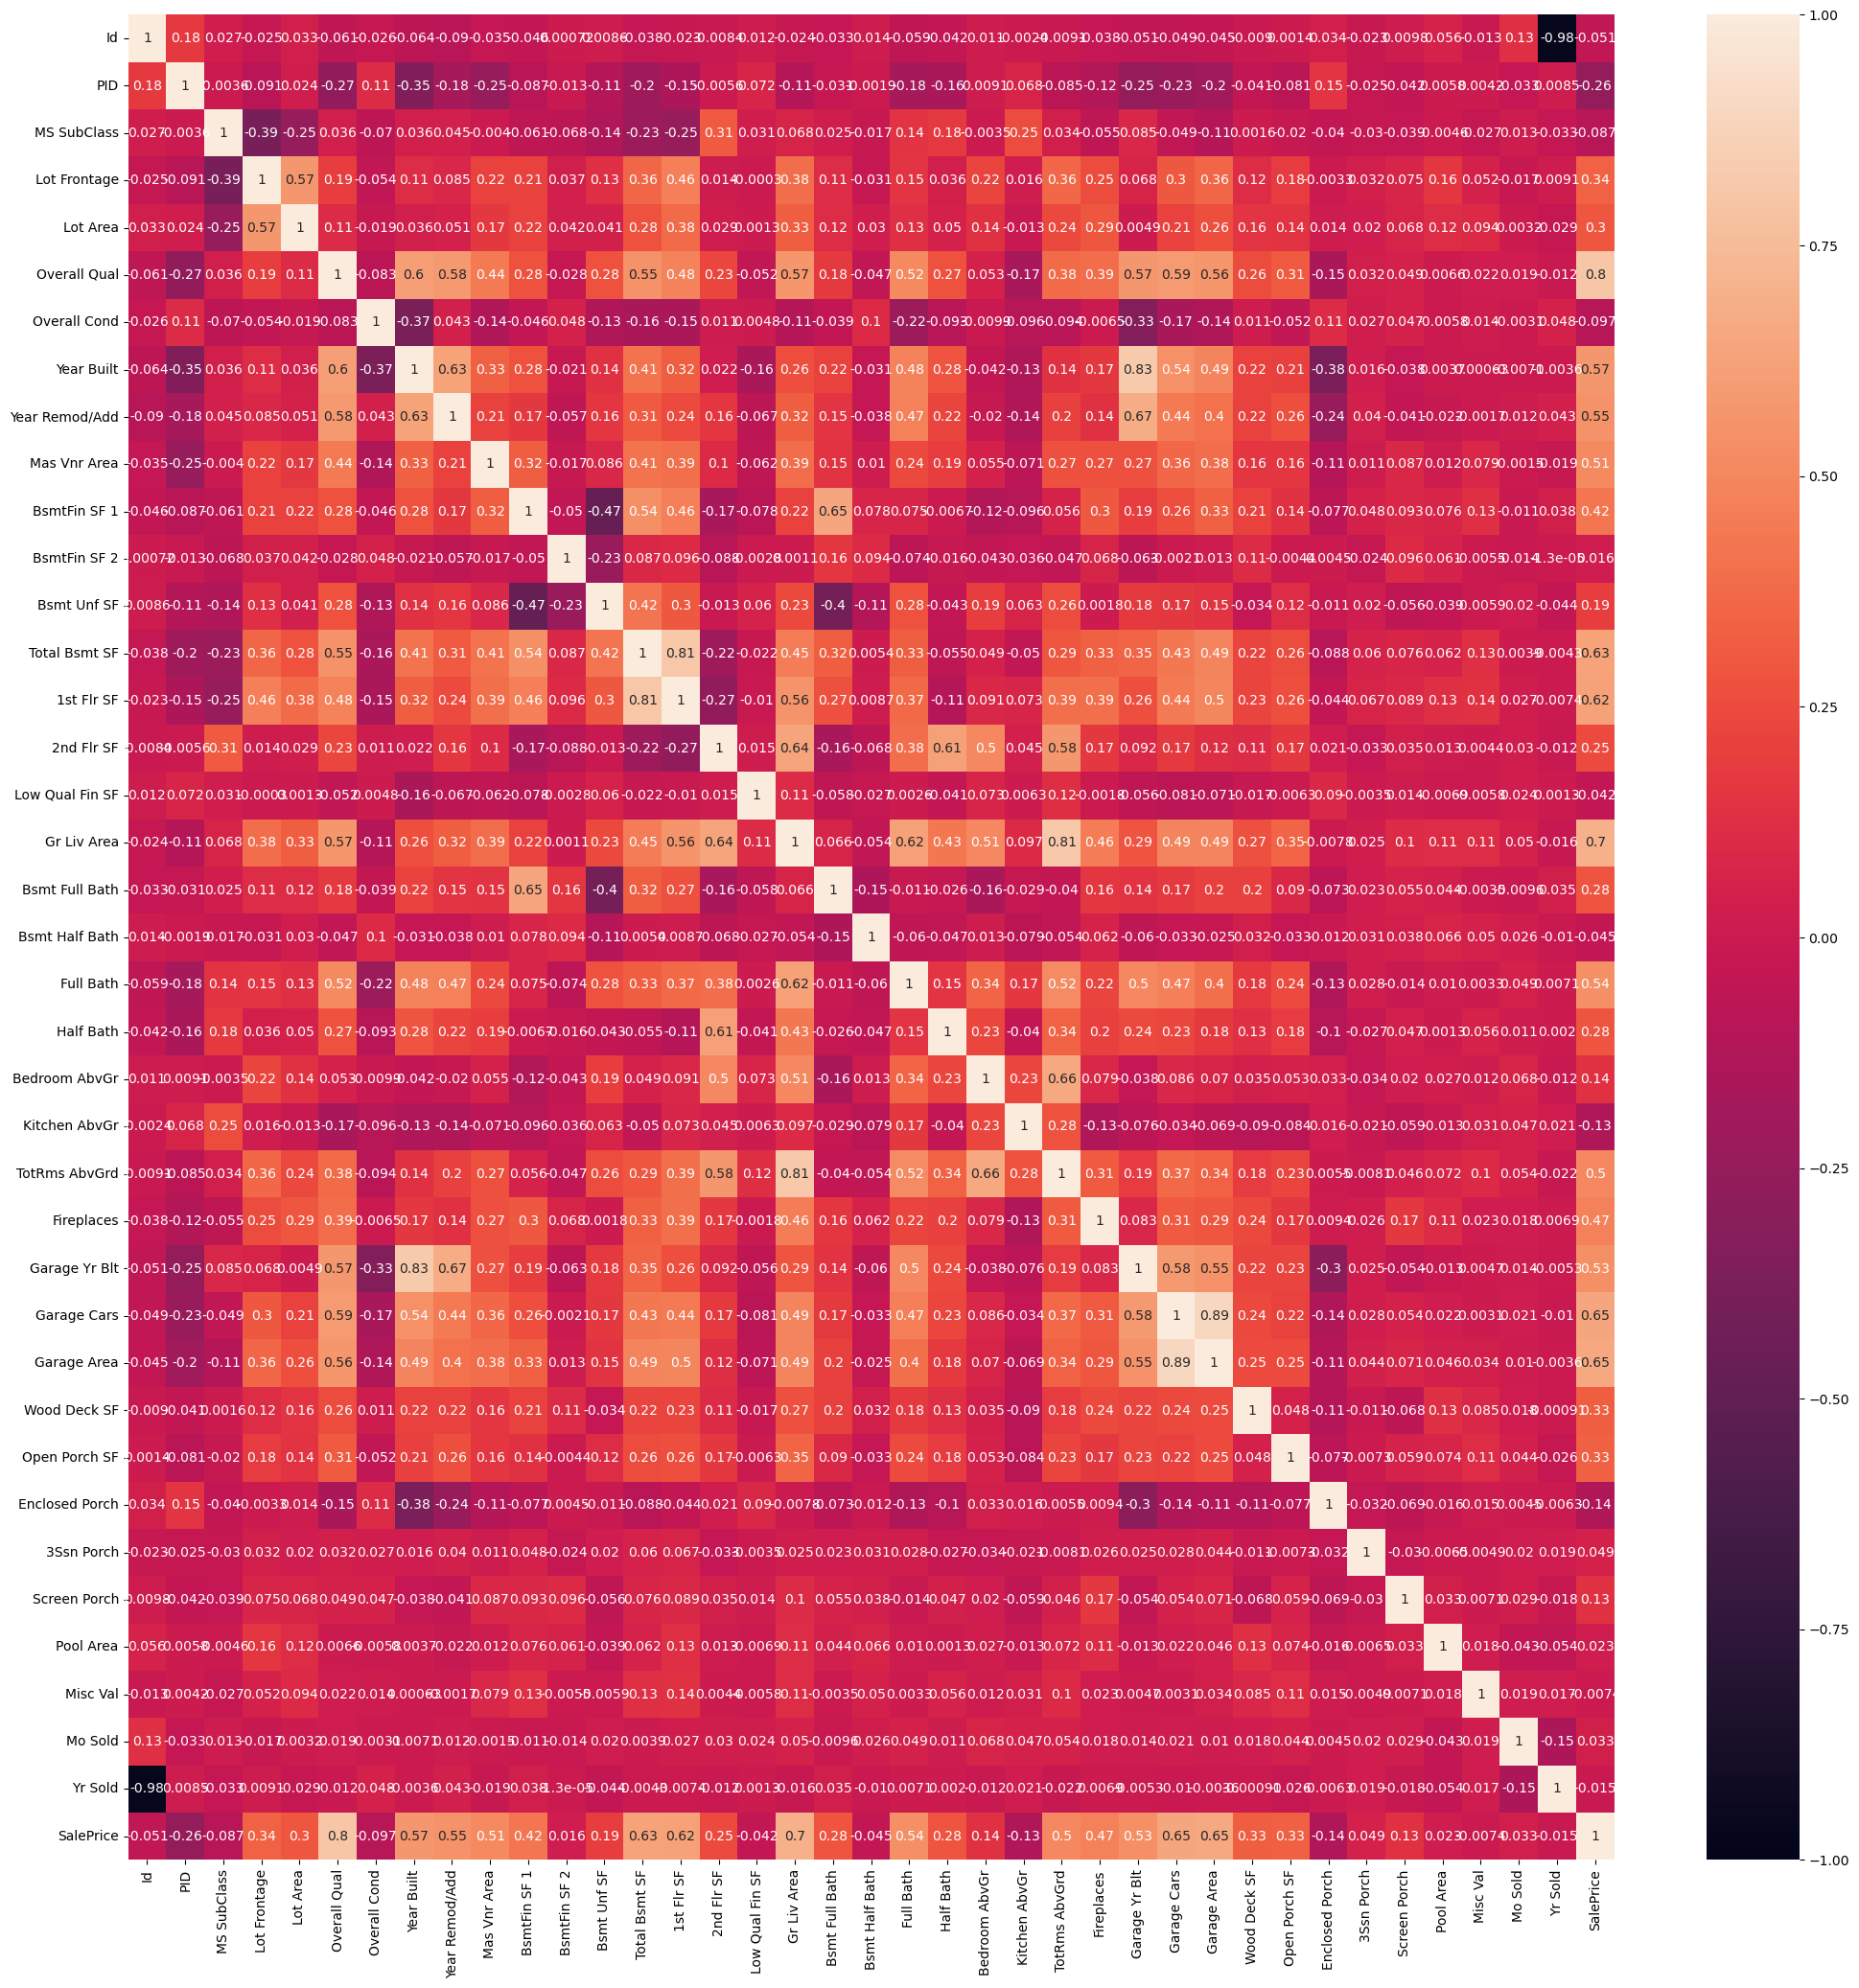

In [66]:
#Training Data
plt.figure(figsize = (25,25))

sns.heatmap(df.corr(numeric_only=True), annot = True, vmin=-1, vmax=1)

<Axes: >

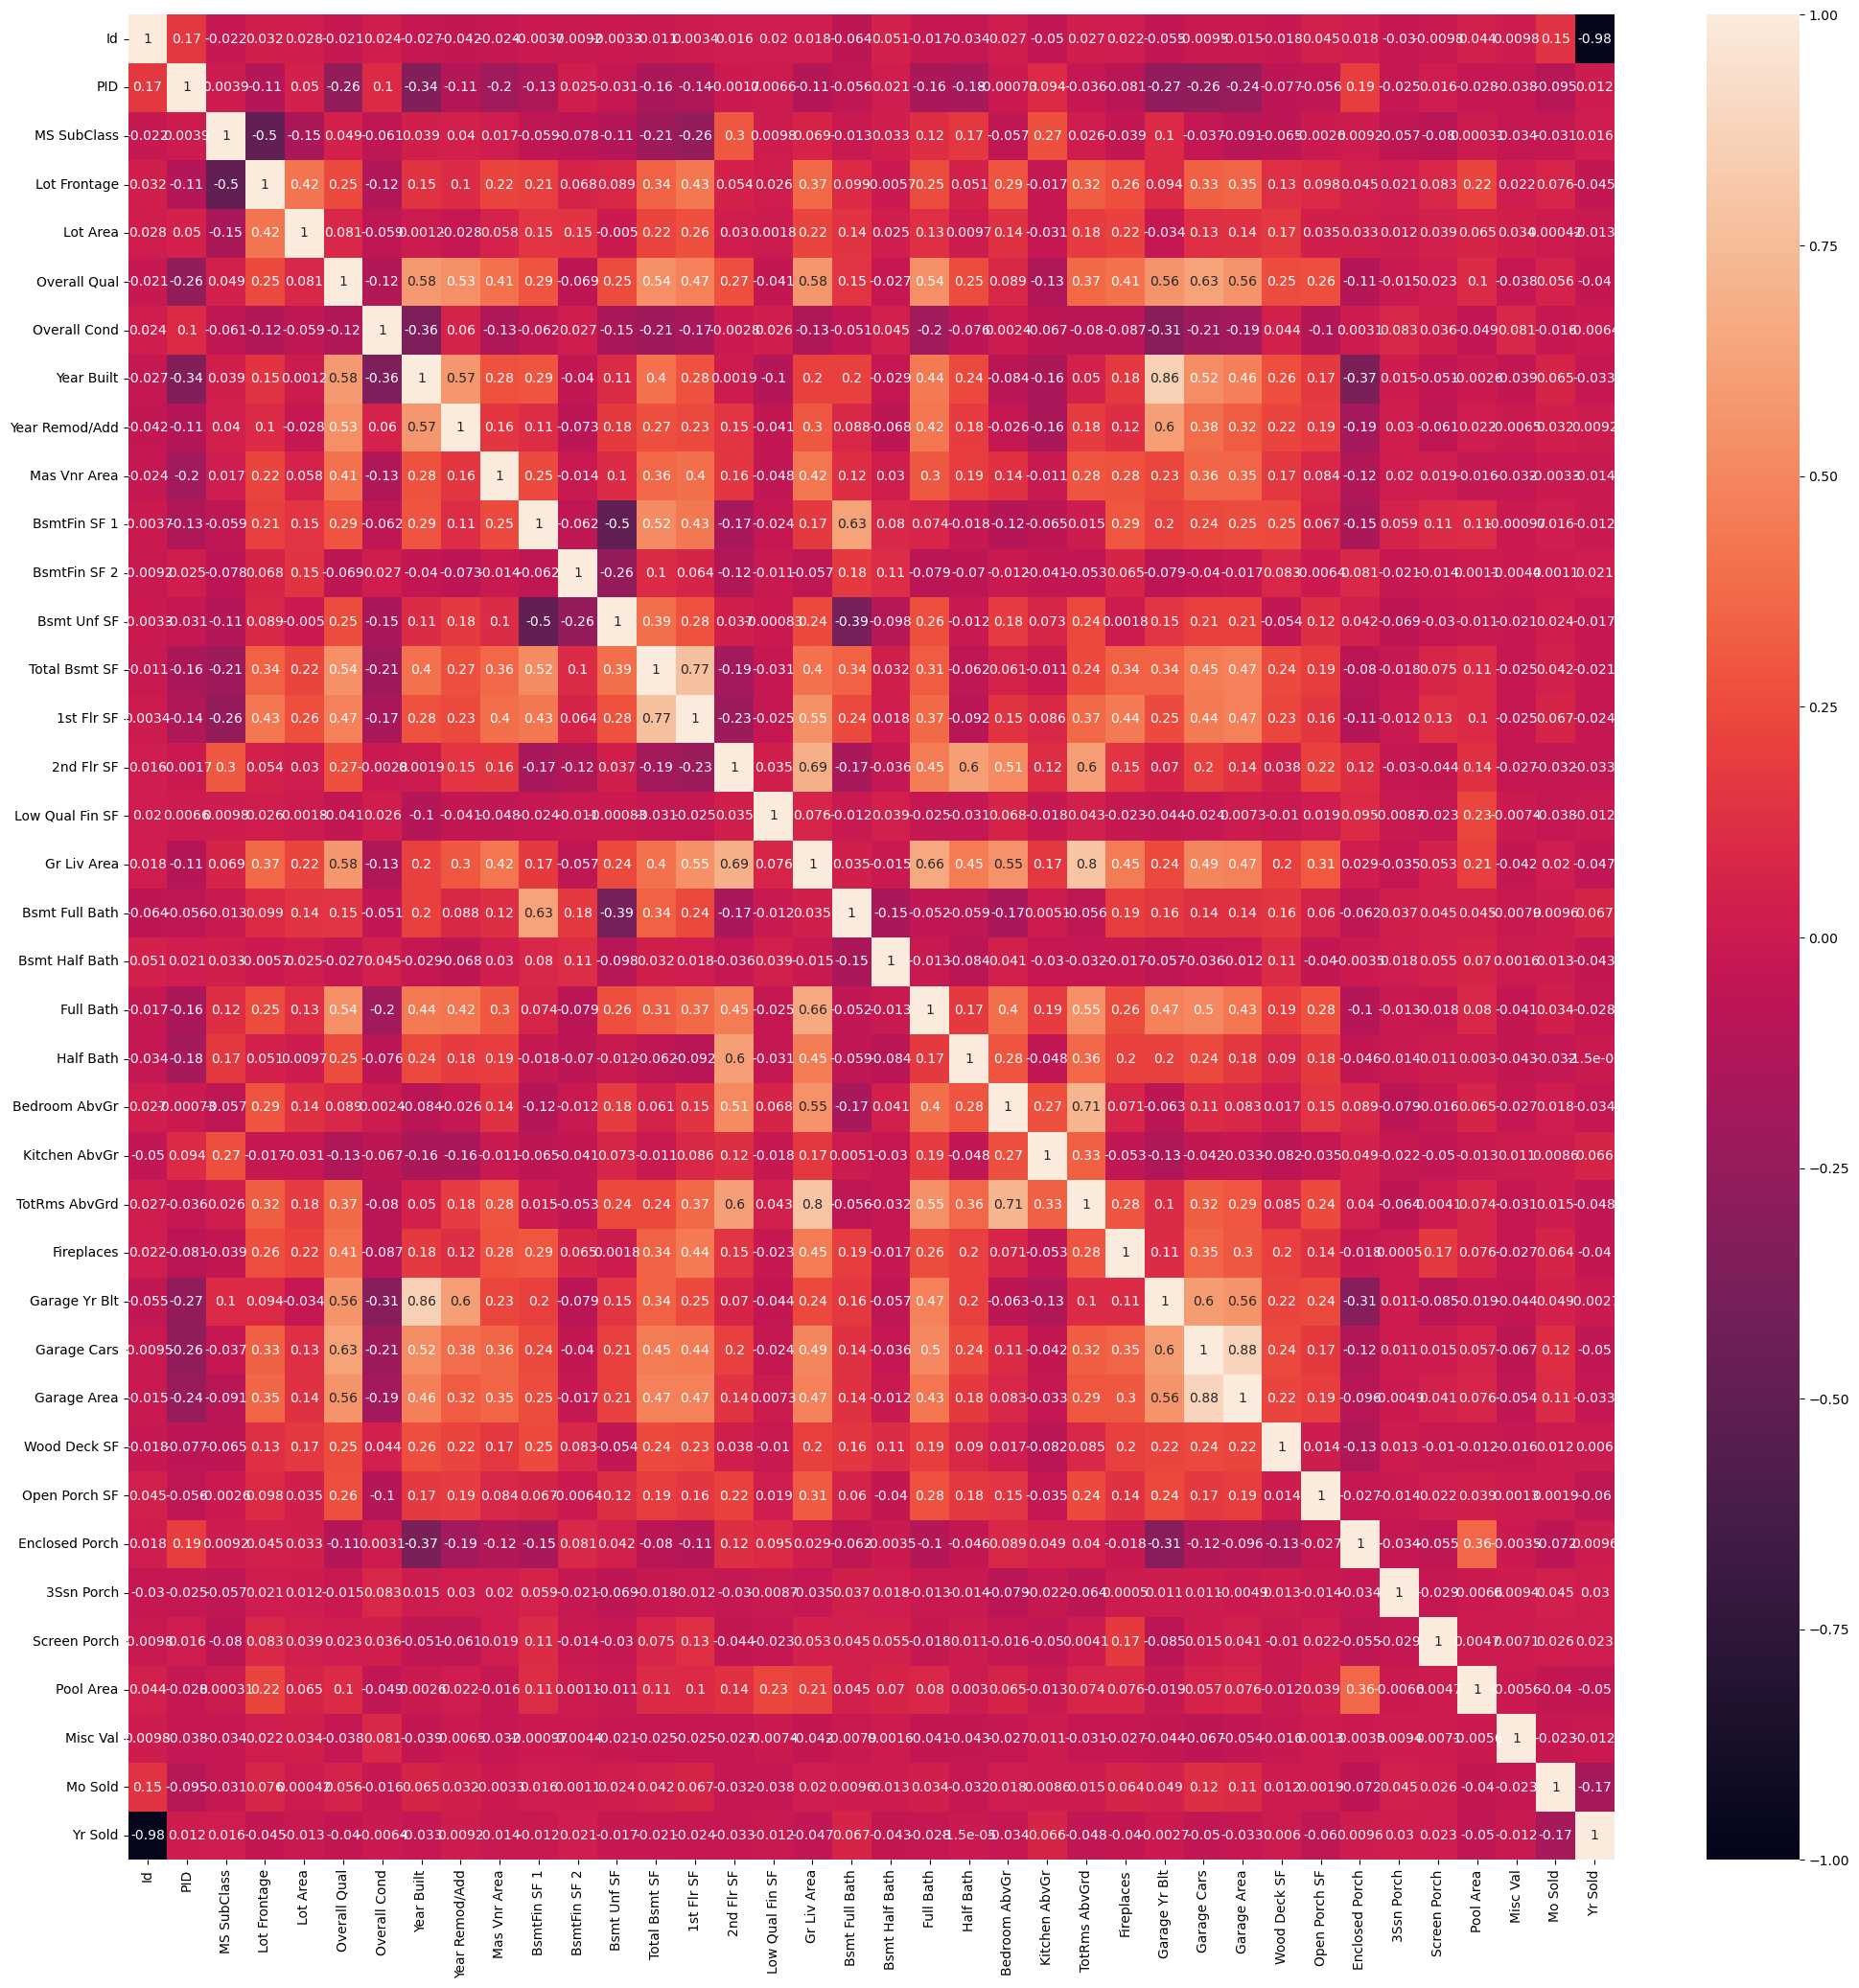

In [67]:
# Testing Data

plt.figure(figsize = (25,25))

sns.heatmap(kaggle_data.corr(numeric_only=True), annot = True, vmin=-1, vmax=1)

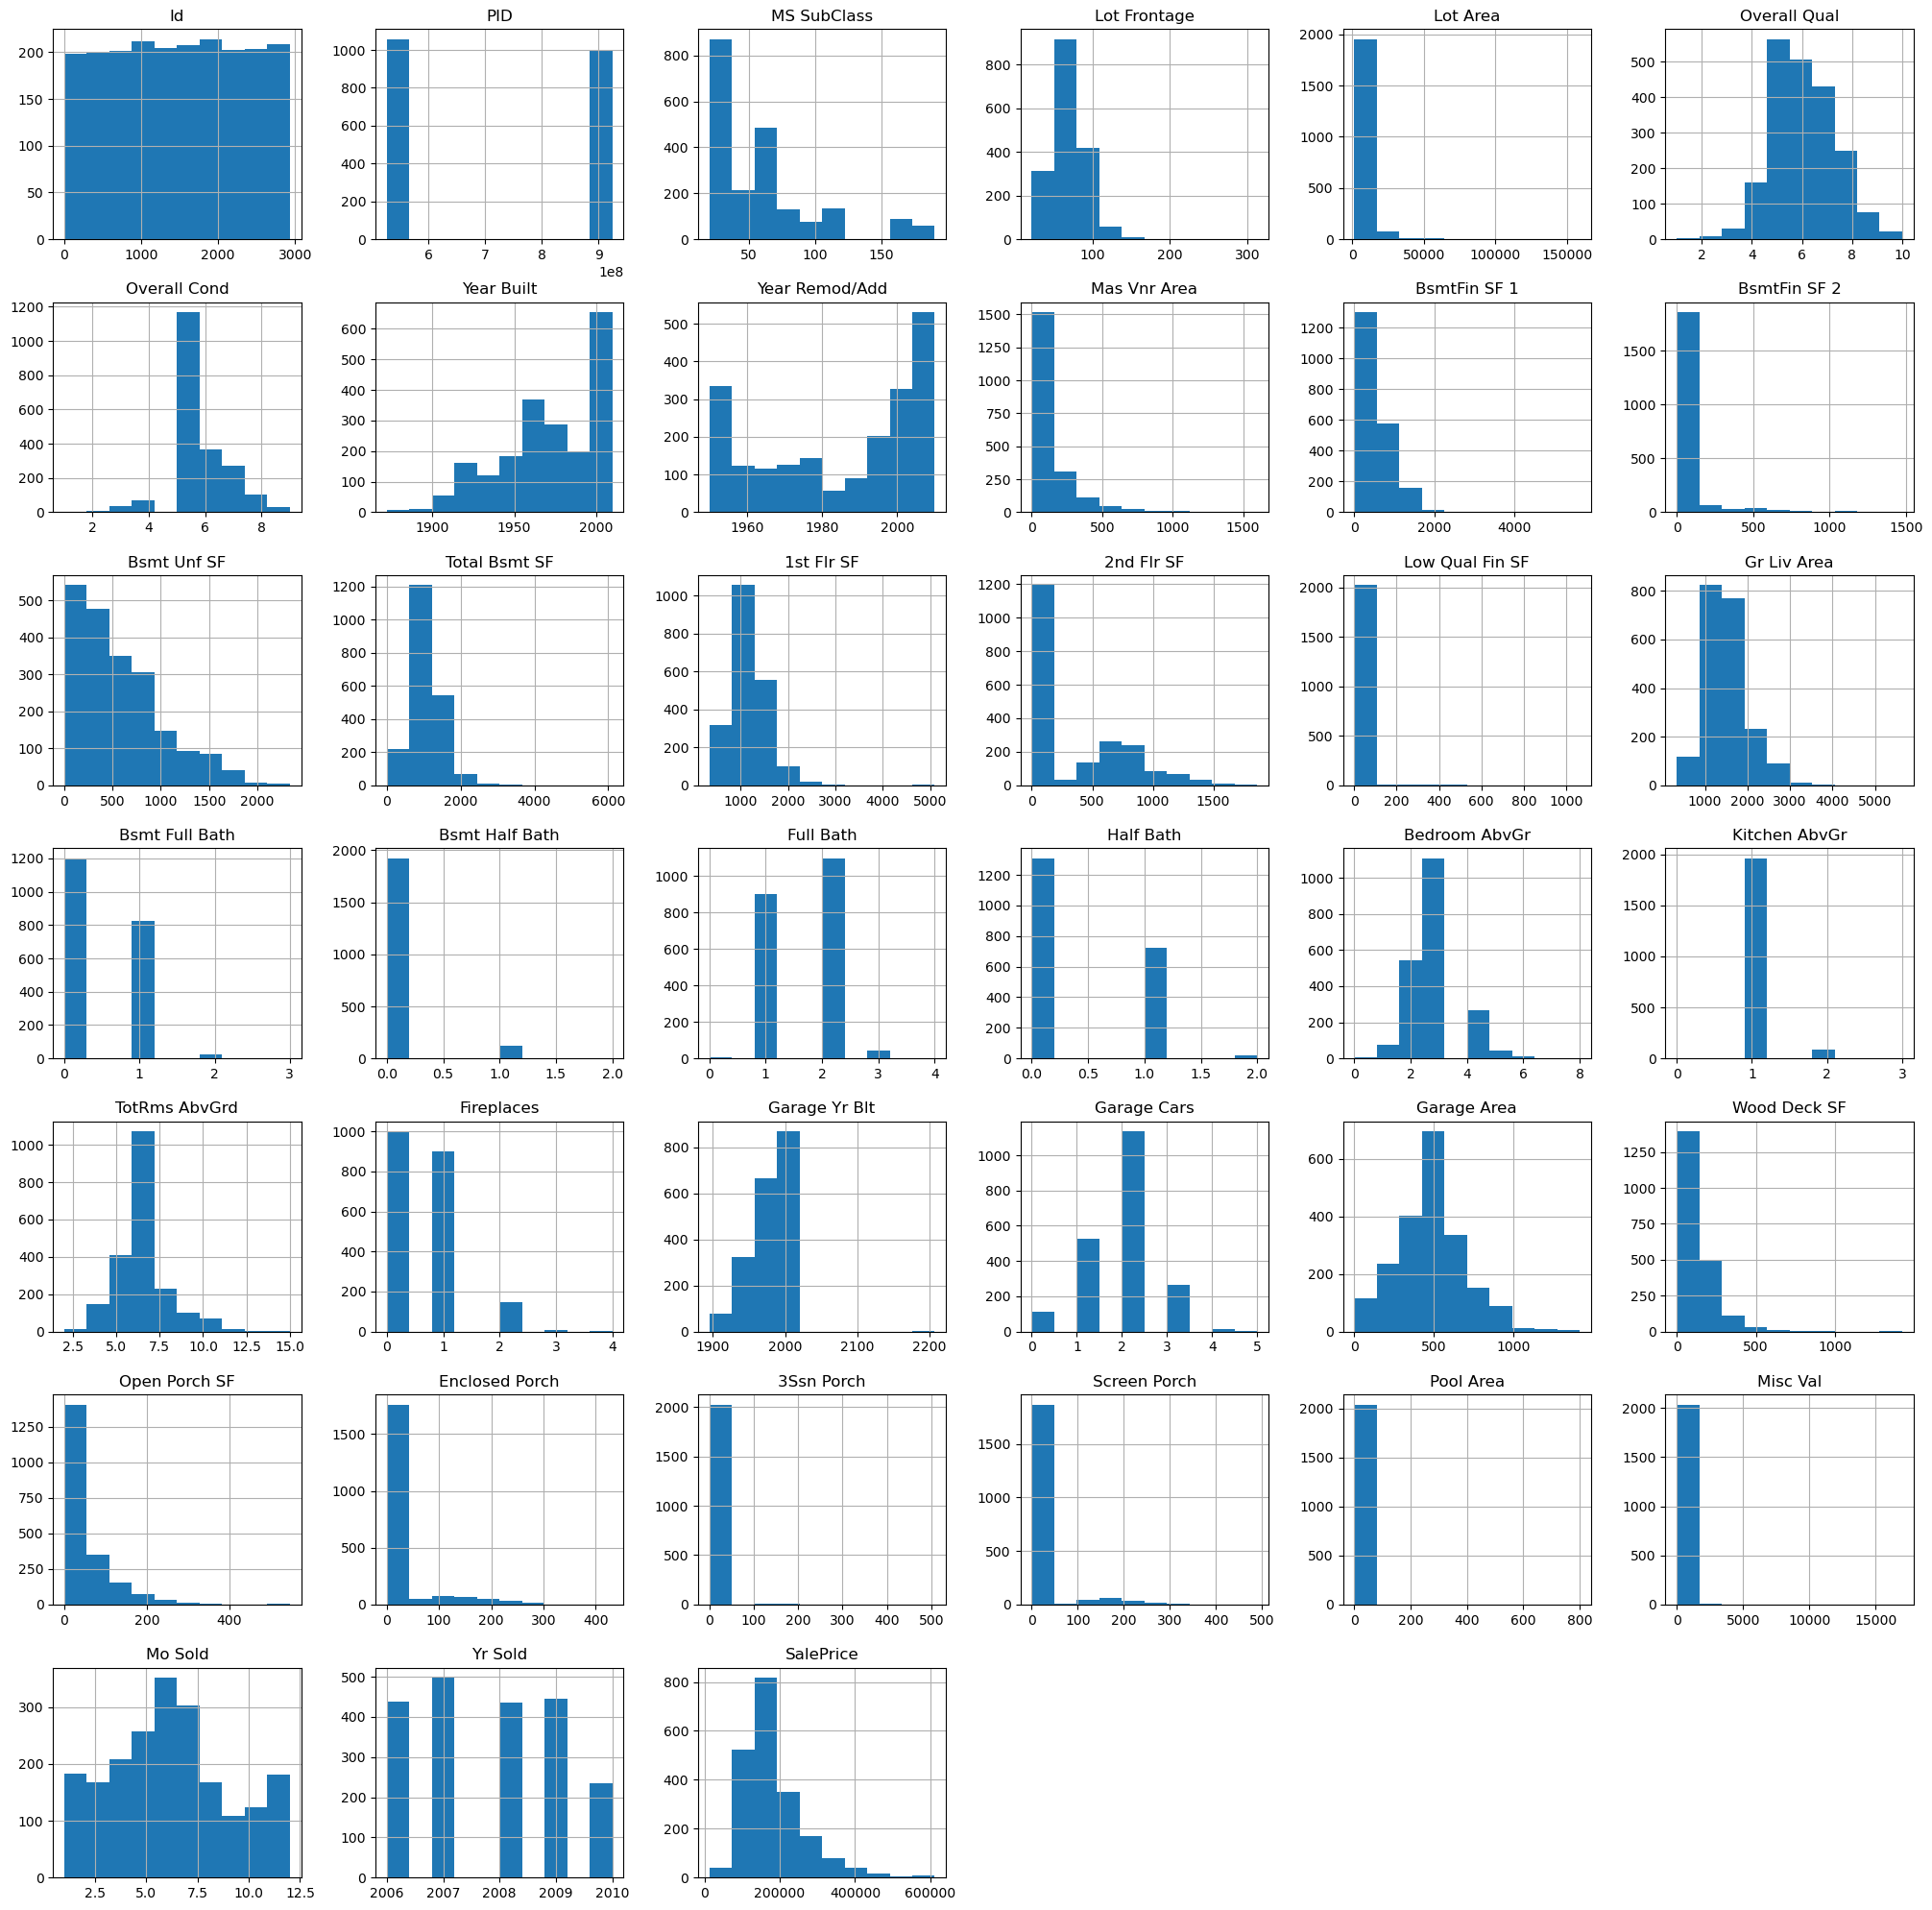

In [68]:
df.hist(figsize = (25, 25));

In [76]:
df.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage Area', 'Garage Qual', 'Garage Cond', 'Paved Drive',
       '

In [78]:
df.groupby('Gr Liv Area')['SalePrice'].mean()

Gr Liv Area
334      39300.0
438      60000.0
480      35311.0
492      61500.0
498      35000.0
          ...   
3608    475000.0
3672    415000.0
3820    284700.0
5095    183850.0
5642    160000.0
Name: SalePrice, Length: 1053, dtype: float64

In [79]:
df['Gr Liv Area'].value_counts()

Gr Liv Area
864     25
1040    20
1092    19
1200    16
1456    15
        ..
1024     1
2232     1
1559     1
1980     1
2630     1
Name: count, Length: 1053, dtype: int64

In [80]:
df['Year Built'].value_counts()

Year Built
2005    102
2006     99
2007     78
2004     72
2003     64
1976     39
1977     38
1920     38
1999     37
2008     36
2002     36
2000     36
1958     35
1998     35
1968     32
1978     32
1959     31
1940     29
1954     28
1967     28
1956     28
1950     28
1970     27
1993     27
1971     26
1910     26
1994     26
1962     25
1966     25
1995     25
1955     24
1996     24
1961     24
1964     24
1963     24
1965     24
2001     24
1972     23
1960     23
1957     23
1925     22
1975     21
1992     21
1948     20
1997     20
1953     20
1900     20
1930     18
1941     18
1915     17
1969     16
1990     16
1980     16
1939     15
1979     15
2009     14
1951     13
1974     13
1973     13
1922     12
1926     12
1988     11
1924     11
1984     11
1952     11
1945     11
1949     11
1923     10
1921      9
1946      9
1936      9
1935      9
1986      9
1947      8
1927      8
1929      8
1928      8
1916      8
1914      7
1938      7
1987      7
1937      7
1989 